In [1]:
# def cleaning():
import pandas as p
import numpy as n
import matplotlib.pyplot as m
data=p.read_csv("Car-details-v3.csv")
data=data.dropna()


In [2]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [4]:
data['name']=data['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [5]:
data.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti Swift Dzire,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
x=data["fuel"].to_numpy()
x=list(x)
for i in range(len(x)):
    if x[i]=="Petrol":
        x[i]=0
    elif x[i]=="Diesel":
        x[i]=1
    elif x[i]=="LPG":
        x[i]=2
    elif x[i]=="CNG":
        x[i]=3
data.fuel=x
#0- petrol,1-diesel,2-lpg,3-cng

In [7]:
data.replace({"seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2}},inplace=True)
data.replace({"transmission":{"Manual":0,"Automatic":1}},inplace=True)
data.mileage=data.mileage.str.split(" ").str.get(0).astype(float)
data.replace({"owner":{"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4}},inplace=True)
data.engine=data.engine.str.split(" ").str.get(0).astype(int)
data.max_power=data.max_power.str.split(" ").str.get(0).astype(float)
del data['torque']
data.reset_index(drop=True)

# data.transmission.value_counts()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire,2014,450000,145500,1,0,0,0,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5,2014,370000,120000,1,0,0,1,21.14,1498,103.52,5.0
2,Honda City 2017-2020,2006,158000,140000,0,0,0,2,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz,2010,225000,127000,1,0,0,0,23.00,1396,90.00,5.0
4,Maruti Swift VXI,2007,130000,120000,0,0,0,0,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,0,0,0,0,18.50,1197,82.85,5.0
7902,Hyundai Verna CRDi,2007,135000,119000,1,0,0,3,16.80,1493,110.00,5.0
7903,Maruti Swift Dzire,2009,382000,120000,1,0,0,0,19.30,1248,73.90,5.0
7904,Tata Indigo CR4,2013,290000,25000,1,0,0,0,23.57,1396,70.00,5.0


In [8]:
data.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,0.572350,0.199722,0.131672,0.447255,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.541406,0.468575,0.338155,0.710854,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,0.000000,0.000000,0.000000,0.000000,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,0.000000,0.000000,0.000000,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1.000000,0.000000,0.000000,1.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


# MODEL


In [9]:
x=data.drop(["name","selling_price"],axis=1)
y=data['selling_price']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# MODEL TRAINING --> Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as s

In [12]:
r=LinearRegression()

In [13]:
r.fit(x_train,y_train)
# x_train

LinearRegression()

In [14]:
x_train_pred=r.predict(x_train)

In [15]:
error_score=metrics.r2_score(y_train,x_train_pred)
error_score

0.6701259078355357

# visualize

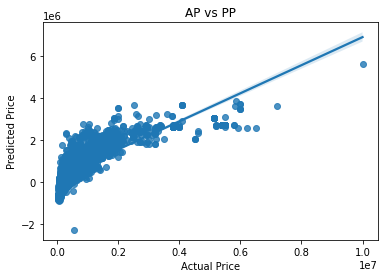

In [16]:
s.regplot(x=y_train,y=x_train_pred)
m.xlabel("Actual Price")
m.ylabel("Predicted Price")
m.title("AP vs PP")
m.show()

In [17]:
x_test_pred=r.predict(x_test)


In [18]:
error_score_test=metrics.r2_score(y_test,x_test_pred)
error_score

0.6701259078355357

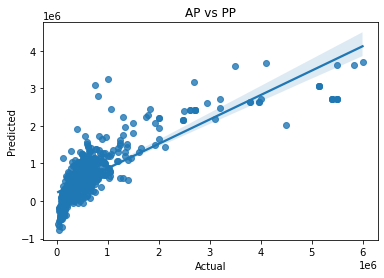

In [19]:
s.regplot(x=y_test,y=x_test_pred)
m.xlabel("Actual")
m.ylabel("Predicted")
m.title("AP vs PP")
m.show()